In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
dt = pd.read_csv("StudentsPerformance.csv")

In [5]:
dt.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [6]:
#summary
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Calculating the null values present
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

1. Find out how many males and females participated in the test.

In [8]:
gender_data=dt.groupby('gender').size().reset_index(name='counts')   
gender_data

,gender,counts
0,female,518
1,male,482


2. What do you think about the students' parental level of education?

In [9]:
parental_education = dt['parental level of education'].value_counts()
parental_education

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

Text(0.5, 1.0, 'parental level of education')

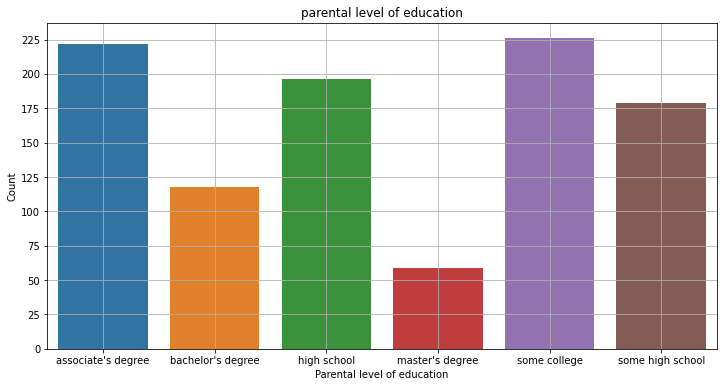

In [11]:
parental_education=dt.groupby('parental level of education').size().reset_index(name='counts')   
parental_education 


plt.figure(figsize=(12,6))
sns.barplot(x= 'parental level of education',y = 'counts',data = parental_education)
plt.yticks(np.arange(0,250,25))
plt.grid(True)
plt.xlabel("Parental level of education")
plt.ylabel("Count")
plt.title("parental level of education")

3. Who scores the most on average for math, reading and writing based on

(o) Gender

In [12]:
# calculating the gender wise average scores for math, reading and writing
avg_scores_gender = dt.groupby('gender')['math score','reading score','writing score'].mean()
avg_scores_gender

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


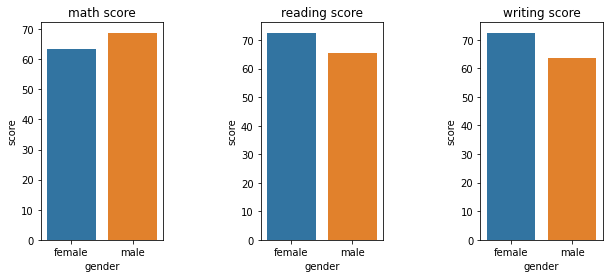

In [13]:

fig, ax = plt.subplots()


fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)

for idx in range(3): # loop for all three features
    plt.subplot(1,3, idx+1) 
    gender_df = dt.groupby("gender")[list(dt.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(dt.columns[-3:])[idx])

(o)Test preparation course

In [15]:
avg_score_test = dt.groupby('test preparation course')['math score','reading score','writing score'].mean()
avg_score_test

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


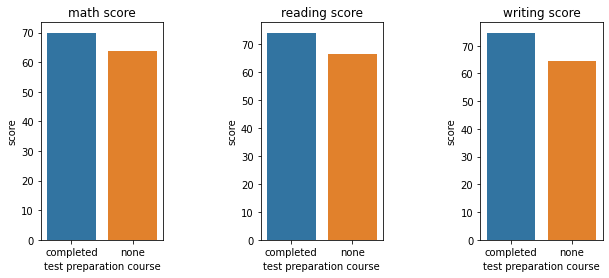

In [16]:

fig, ax = plt.subplots()

fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)

for idx in range(3): # loop for all three features
    plt.subplot(1,3, idx+1)
    gender_df = dt.groupby("test preparation course")[list(dt.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(dt.columns[-3:])[idx])

4. What do you think about the scoring variation for math, reading and writing based on

(1) Gender

In [17]:
math_score_gender = dt.groupby('gender')['math score'].describe()
math_score_gender

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.376448,16.029928,0.0,54.0,65.0,74.0,100.0
male,482.0,68.821577,14.556411,27.0,59.0,69.0,79.0,100.0


In [18]:
reading_score_gender = dt.groupby('gender')['reading score'].describe()
reading_score_gender

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.590734,14.411018,17.0,63.25,73.0,83.0,100.0
male,482.0,65.545643,14.149594,23.0,56.00,66.0,76.0,100.0


In [19]:
writing_score_gender = dt.groupby('gender')['writing score'].describe()
writing_score_gender

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.467181,14.844842,10.0,64.0,74.0,82.0,100.0
male,482.0,63.446058,14.227225,15.0,53.0,64.0,74.0,100.0


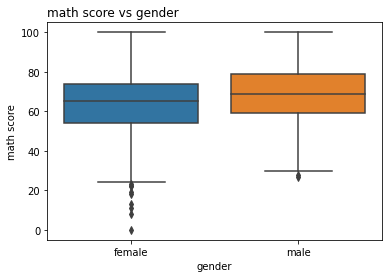

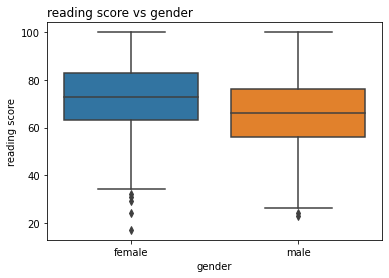

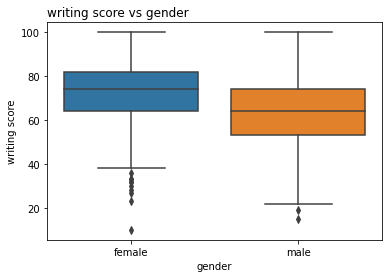

In [20]:
for item in data.columns[-3:]:
    sns.boxplot(x=data["gender"], y=data[item]) # checking any outliers present in the dataset 
    plt.title(item+" vs gender", loc="left")
    plt.show()

(2) Test preparation course

In [23]:
math_score_test = dt.groupby('test preparation course')['math score'].describe()
math_score_test



,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,69.96648,14.521847,23.0,61.0,70.0,79.0,100.0
none,642.0,63.78972,15.705689,0.0,54.0,64.0,74.0,100.0


In [24]:
reading_score_test = dt.groupby('test preparation course')['reading score'].describe()
reading_score_test

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,74.175978,13.537572,37.0,66.0,75.0,84.0,100.0
none,642.0,66.417445,14.608896,17.0,57.0,67.0,76.0,100.0


In [25]:
writing_score_test = dt.groupby('test preparation course')['writing score'].describe()
writing_score_test

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,74.684358,13.236412,36.0,67.0,76.0,83.75,100.0
none,642.0,64.457944,15.041667,10.0,54.0,65.0,74.00,100.0


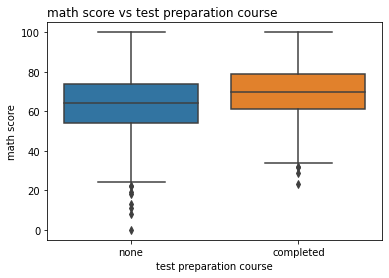

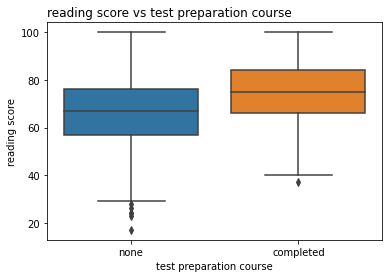

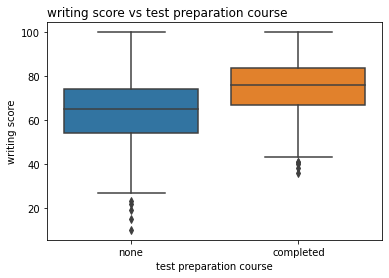

In [26]:
for item in data.columns[-3:]:
    sns.boxplot(x=data["test preparation course"], y=data[item]) # checking any outliers present in the dataset 
    plt.title(item+" vs test preparation course", loc="left")
    plt.show()

5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this

In [27]:
dt.describe().T 

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.001,15.569567,0.0,57.0,66.0,77.00,100.0
reading score,1000.0,69.195,14.706436,17.0,59.0,70.0,79.25,100.0
writing score,1000.0,68.119,15.226381,10.0,58.0,69.0,79.00,100.0


In [28]:
top25 = dt[(dt['math score'] >= 77.00)]
top25

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [29]:
math_top25 = top25['gender'].value_counts()
math_top25

male      151
female    104
Name: gender, dtype: int64

In [30]:
math_top25.sum()

255

255 students can achieve the bonus points from management. This constitute 151 males and 104 females